In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Kanzashi,1941
1,24 Hours,1931
2,Red Mantis,2009
3,Ruby Skye P.I.: The Spam Scam,2010
4,County General,2005


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [24]:
c = cast
t = titles

### What are the ten most common movie names of all time?

In [39]:
t = titles
t.groupby(['title']).size().sort_values(ascending = False).head()

title
Hamlet        20
Carmen        17
Macbeth       16
Temptation    12
Maya          12
dtype: int64

In [40]:
titles.title.value_counts().head(10)

Hamlet                  20
Carmen                  17
Macbeth                 16
Temptation              12
Maya                    12
The Outsider            12
The Three Musketeers    11
Othello                 11
Honeymoon               11
Freedom                 11
Name: title, dtype: int64

In [41]:
titles.groupby(titles.title).size().sort_values(ascending = False).head()

title
Hamlet        20
Carmen        17
Macbeth       16
Temptation    12
Maya          12
dtype: int64

### Which three years of the 1930s saw the most films released?

In [42]:
t3 = titles[titles.year//10 == 193]


In [43]:
t3.year.value_counts().head(3)

1937    1224
1936    1169
1938    1163
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

In [44]:
tp = t['year']//10

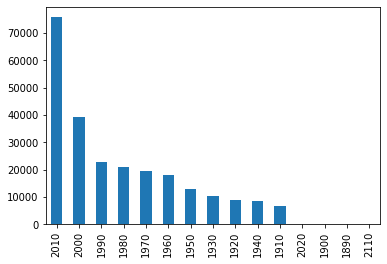

In [45]:
#Or we can simply add ()


(t.year//10*10).value_counts().plot(kind = 'bar')

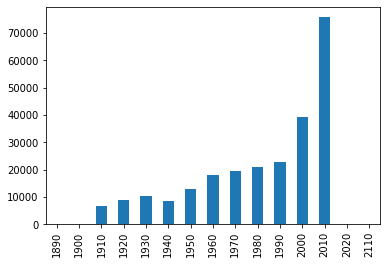

In [46]:
# It is a mess as there is no order established for the years

(t.year//10*10).value_counts().sort_index().plot(kind = 'bar')

### Plot the number of "Hamlet" films made each decade.

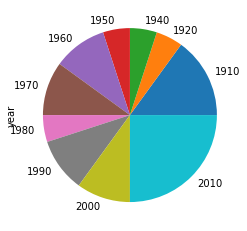

In [47]:
(t[t.title == 'Hamlet'].year//10*10).value_counts().sort_index().plot(kind = 'pie')

### Plot the number of "Rustler" characters in each decade of the history of film.

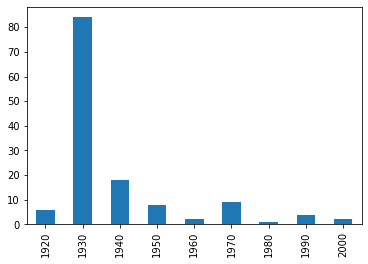

In [48]:
(cast[cast.character == 'Rustler'].year//10*10).value_counts().sort_index().plot(kind = 'bar')

In [49]:
r = cast[cast.character == 'Rustler'].year//10*10


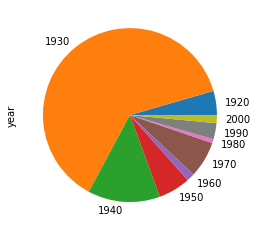

In [50]:
r.value_counts().sort_index().plot(kind = 'pie')

### Plot the number of "Hamlet" characters each decade.

Let's try do this in two methods

In [51]:
c = cast

1910     6
1920     1
1930     6
1940     1
1950     4
1960     7
1970     8
1980     2
1990    11
2000    19
2010    31
Name: year, dtype: int64

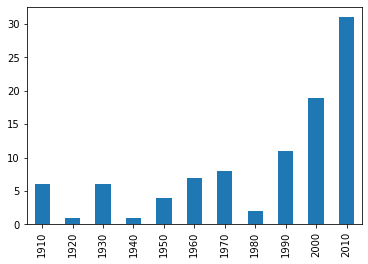

In [52]:
# First method, just do this using the Series.values_counts() method

(c[c.character == 'Hamlet'].year//10*10).value_counts().sort_index()
(c[c.character == 'Hamlet'].year//10*10).value_counts().sort_index().plot(kind = 'bar')

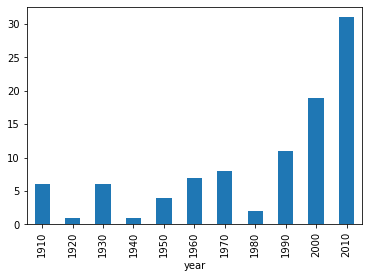

In [53]:
# Second method, let's just try with groupby

ch = c[c.character == 'Hamlet']
ch.groupby(ch.year//10*10).size().plot(kind = 'bar')

### What are the 11 most common character names in movie history?

In [54]:
c.character.value_counts().sort_values(ascending = False).head(11)

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Herself         6705
Name: character, dtype: int64

In [55]:
c.groupby(c.character)['character'].count().sort_values(ascending = False).head(11)

character
Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Herself         6705
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [61]:
c[c.character == 'Herself'].name.value_counts().sort_values(ascending = False).head(15)

Queen Elizabeth II           12
Joyce Brothers                9
Mar?a Luisa (V) Mart?n        9
Luisa Horga                   9
Hillary Clinton               8
Margaret Thatcher             8
In?s J. Southern              6
Sumie Sakai                   6
Marta Berrocal                6
Marilyn Monroe                6
Oprah Winfrey                 6
Mar?a Isabel (III) Mart?n     6
Joan Rivers                   6
Rekha                         6
Estrella Borja                5
Name: name, dtype: int64

In [62]:
c[c.name.str.contains('Maria')]

,title,year,name,type,character,n
5856,Bergblut,2010,Martin Maria Abram,actor,Gallus Egger,5.0
5857,Berlina - Eine Reise ins Ungewisse,1991,Martin Maria Abram,actor,Salesman,NaN
5858,Beste Gegend,2008,Martin Maria Abram,actor,Guiseppe,NaN
5859,Der Atem des Himmels,2010,Martin Maria Abram,actor,Father Jenny,14.0
5860,Elser,2015,Martin Maria Abram,actor,Ludwig Elser,10.0
...,...,...,...,...,...,...
3785696,Dreiviertelmond,2011,Marianna ?lmez,actress,Stationsschwester,18.0
3785750,Uuno Epsanjassa,1985,Maria ?sterberg,actress,S?rsselss?nin kihlatun seuralainen,NaN
3785771,The Rain,2016,Marianne ?stlund,actress,Seb's mother,22.0
3786065,The Thrill of a Kill,2011,Maria A. Lie ?verg?rd,actress,Creeping zombie,NaN


### Who are the 10 people most often credited as "Himself" in film history?

In [15]:
c[c.character == 'Himself'].name.value_counts().sort_values(ascending = False).head(10)
# Actually value_counts() will return in descending order so sort_values is unnecessary

c[c.character == 'Himself'].name.value_counts().head(10)

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64

Adolf Hitler          99
Richard Nixon         44
Ronald Reagan         41
John F. Kennedy       37
George W. Bush        25
Winston Churchill     24
Martin Luther King    23
Ron Jeremy            22
Bill Clinton          22
Benito Mussolini      21
Name: name, dtype: int64

In [10]:
c[c.character == 'Himself'].groupby(['name']).size().sort_values(ascending = False).head(10)

name
Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Ron Jeremy               22
Franklin D. Roosevelt    21
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [14]:
c[c.year == 1945].name.value_counts()#.sort_values(ascending = False).head(1)

Emmett Vogan           39
Sam (II) Harris        33
Bess Flowers           29
Harold Miller          29
Franklyn Farnum        27
                       ..
Lyyli Erjakka           1
Jack (II) Martin        1
Betty (II) Caldwell     1
Margaret Landry         1
Frank Richards          1
Name: name, Length: 7824, dtype: int64

In [16]:
c[c.year == 1945].name.value_counts().head(1)

Emmett Vogan    39
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [17]:
c[c.year == 1985].name.value_counts().head(1)

Mammootty    22
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

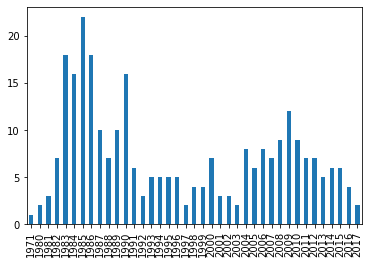

In [20]:
c[c.name == 'Mammootty'].year.value_counts().sort_index().plot(kind = 'bar')

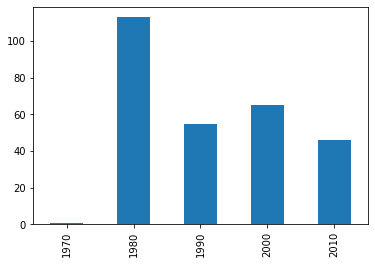

In [24]:
(c[c.name == 'Mammootty'].year//10*10).value_counts().sort_index().plot(kind = 'bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [12]:
c[c.character.str.startswith('Patron in')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             4
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Quiet Bar              2
Name: character, dtype: int64

In [16]:
c[c.character.str.startswith('Patron in')].groupby('character').size().sort_values(ascending = False).head(10)

character
Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in restaurant             4
Patron in Bar                    4
Patron in Club                   3
Patron in cabaret                3
Patron in Restaurant             3
Patron in Coffee Shop            2
dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [18]:
c[c.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         60
Science Student          9
Science Fair Student     9
Science Fair Judge       6
Science Fair Kid         5
Science Promo Cadet      5
Science Reporter         5
Science Kid              5
Science Club Member      5
Science                  4
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

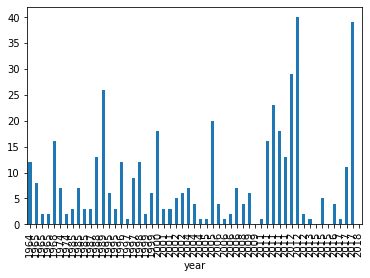

In [34]:
c[c.name == 'Judi Dench'].set_index('year').sort_index().n.plot(kind = 'bar')

In [36]:
(c[c.name == 'Judi Dench'].year//10*10).value_counts()

2010    17
2000    17
1990     8
1980     6
1960     5
1970     2
Name: year, dtype: int64

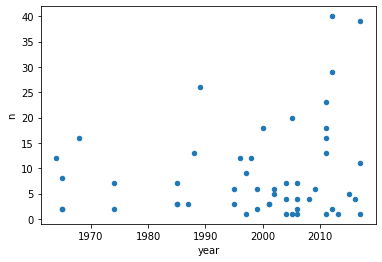

In [29]:
jd = c[c.name == 'Judi Dench'].sort_values('year')
jd = jd[jd.n.notna()]
jd.plot(x = 'year', y = 'n', kind = 'scatter')

### Plot the n-values of Cary Grant's roles through his career.

,year,n
871419,1932,9.0
871418,1932,2.0
871392,1932,3.0
871437,1932,8.0
871409,1932,1.0
...,...,...
871441,1962,1.0
871395,1963,1.0
871403,1964,1.0
871462,1966,1.0


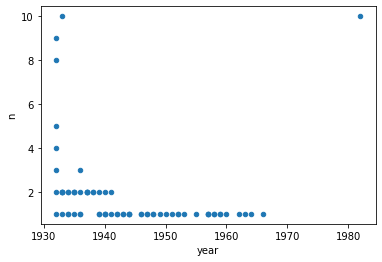

In [21]:
cg = c[c.name == 'Cary Grant'][['year', 'n']].sort_values('year').dropna()
cg
cg.plot(x = 'year', y = 'n', kind = 'scatter')

,title,year,name,type,character,n
871419,Merrily We Go to Hell,1932,Cary Grant,actor,Charlie Baxter,9.0
871418,Madame Butterfly,1932,Cary Grant,actor,Lieutenant B.F. Pinkerton,2.0
871392,Blonde Venus,1932,Cary Grant,actor,Nick Townsend,3.0
871437,Sinners in the Sun,1932,Cary Grant,actor,Ridgeway,8.0
871409,Hot Saturday,1932,Cary Grant,actor,Romer Sheffield,1.0
...,...,...,...,...,...,...
871441,That Touch of Mink,1962,Cary Grant,actor,Philip Shayne,1.0
871395,Charade,1963,Cary Grant,actor,Peter Joshua,1.0
871403,Father Goose,1964,Cary Grant,actor,Walter,1.0
871462,Walk Don't Run,1966,Cary Grant,actor,Sir William Rutland,1.0


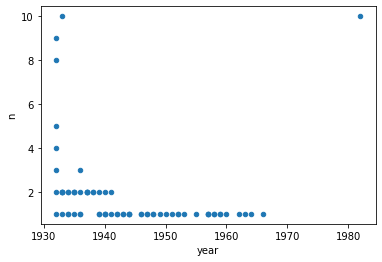

In [26]:
# Actually don't need to select here

cg = c[c.name == 'Cary Grant'].sort_values('year').dropna()
cg
cg.plot(x = 'year', y = 'n', kind = 'scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

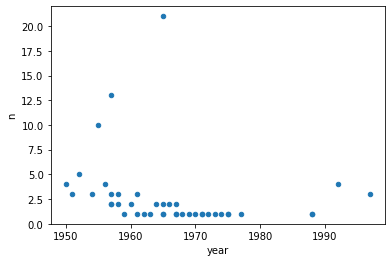

In [35]:
sp = c[c.name == 'Sidney Poitier'].sort_values('year')
sp = sp[sp.n.notnull()]
sp.plot(x = 'year', y = 'n', kind = 'scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [41]:
lr = c[(c.year//10 == 195)&(c.n==1)]
lr.groupby(['type']).size()

type
actor      6692
actress    3040
dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [42]:
sr = c[(c.year//10 == 195)&(c.n == 2)]
sr.groupby(['type']).size()

type
actor      4640
actress    4635
dtype: int64